## Clustering

## Outcomes

In this assignment, you will do the following:

* Explore a dataset and carry out clustering using k-means algorithm

* Identify the optimum number of clusters for a given dataset



## Problem Description

In this assignment, you will study the electricity demand from clients in Portugal, during 2013 and 2014. You have been provided with the data file, which you should download when you download this assignment file.

The data$^1$ available contains 370 time series, corresponding to the electric demand$^2$ for 370 clients, between 2011 and 2014. 

In this guided exercise, you will use clustering techniques to understand the typical usage behaviour during 2013-2014.

Both these datasets are publicly available, and can be used to carry out experiments. Their source is below:

 1. Data:
https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014#

 2. Electric Demand:
http://www.think-energy.net/KWvsKWH.htm

We will start by exploring the data set and continue on to the assignment.  Consider this as a working notebook, you will add your work to the same notebook.

In this assignment we will use the sklearn package for k-means.  Please refer here for the documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

The sklearn package for k-means is one of the many clustering algorithms found in the module "sklearn.cluster".  These come with a variety of functions that you can call by importing the package.

For example 
    
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans



## Data Preparation

Start by downloading the data to a local directory and modify the "pathToFile" and "fileName" variables, if needed. The data file has been provided with this assignment. It is also available at the links provided above.

In [1]:
pathToFile = r""
#pathToFile = r"C:\\Users\\<your username>\\Downloads\\"

fileName = 'LD2011_2014.txt'

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)

In [3]:
# Replace "," by ".", otherwise the numbers will be in the form 2,3445 instead of 2.3445
import fileinput

with fileinput.FileInput(pathToFile+fileName, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(",", "."), end='')

In [4]:
# Create dataframe
import pandas as pd
data = pd.read_csv(pathToFile+fileName, sep=";", index_col=0)

### Quick data inspection

In [5]:
data.head(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.tail(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.17524,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.17524,249.158249,62.937063,69.892473,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


In [7]:
data.shape

(140256, 370)

#### As it can be seen, the dataframe contains a row for each interval of 15 minutes between Jan 1, 2011 to Dec 31 2014. There are 370 columns corresponding 370 clients. The dataframe is indexed by the timestamp.

Since the frequency is 15 minutes, each day provides $24\times 4 = 96$ datapoints, which multiplied by 365 days and 4 years (plus 1 day in Feb 29, 2012) gives: $96 \times 365 \times 4 + 96 = 140256$, as observed in data.shape

**Data set information from UCI Machine Learning Repository**

**Abstract**: This data set contains electricity consumption of 370 points/clients.


**Data set information:**

Data set has no missing values.

Values are in kW of each 15 min. To convert values in kWh values must be divided by 4.

Each column represent one client. Some clients were created after 2011. In these cases consumption were considered zero.

All time labels report to Portuguese hour. However all days present 96 measures (24*4). Every year in March time change day (which has only 23 hours) the values between 1:00 am and 2:00 am are zero for all points. Every year in October time change day (which has 25 hours) the values between 1:00 am and 2:00 am aggregate the consumption of two hours.


**Attribute Information:**

Data set were saved as txt using csv format, using semi colon (;).
First column present date and time as a string with the following format 'yyyy-mm-dd hh:mm:ss'
Other columns present float values with consumption in kW


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


In [9]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


### Plot the first 2 days of 2012 for the first 2 clients

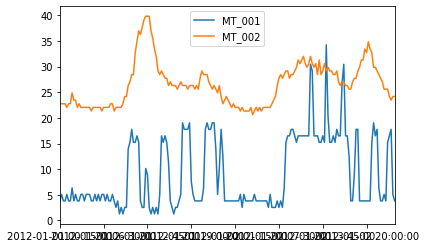

In [10]:
data_example = data.loc['2012-01-01 00:15:00':'2012-01-03 00:00:00'][['MT_001','MT_002']]
data_example.plot()
plt.show()

#### We  note that the main difference between the curves is the level (also seen on the means in df.describe()).  We know we will have to somehow normalize the curves, in order for the clustering technique to capture the behaviour of the consumption throughout the day.

### Data for the analysis

We focus on 2013 and 2014 because these are the years with low number of clients having zero demand

In [11]:
data2011 = data.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = data.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = data.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = data.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [12]:
# Check number of days
print(data2011.shape[0]/96)
print(data2012.shape[0]/96)
print(data2013.shape[0]/96)
print(data2014.shape[0]/96)

365.0
366.0
365.0
365.0


In [13]:
# See number of clients with 0 demand per year
print(sum(data2011.mean()==0))
print(sum(data2012.mean()==0))
print(sum(data2013.mean()==0))
print(sum(data2014.mean()==0))

210
37
21
1


In [14]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0] # clients with 0 demand
data_13_14 = data2013.append(data2014) # appending 2013 and 2014
data_13_14 = data_13_14.drop(clients_no_demand, axis=1) # drop clients with 0 demand
print(data_13_14.shape)
print(sum(data_13_14.mean()==0)) # check that there are no clients with 0 demand

(70080, 349)
0


## Getting average curves per client

In [15]:
data = data_13_14.copy() # weekdays weekends, data2011, data2012, data2013, data2014

In [16]:
data['hour'] = data.index.map(lambda x: x[11:])

In [17]:
data.head(3)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,hour
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486,00:15:00
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486,00:30:00
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649,00:45:00


### Getting average curves per client

In [18]:
datagrouped = data.groupby("hour")
average_curves = datagrouped.agg("mean")
average_curves.shape 

(96, 349)

In [19]:
average_curves.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
hour,,,,,,,,,,,,,,,,,,,,,
00:00:00,5.008344,26.045909,1.938755,130.551843,60.374206,191.136660,7.772366,242.027582,51.585401,54.837237,...,119.625903,36306.438356,1333.223513,1652.677460,37.831080,16.499275,676.790504,148.683880,799.235729,17333.891151
00:15:00,4.917947,25.833512,1.911381,125.863125,57.586034,179.297130,7.426996,232.516950,50.016764,53.424658,...,119.540837,32137.534247,979.064794,1443.711083,33.942955,16.580232,659.875882,155.464587,795.100028,17466.227323
00:30:00,4.984007,24.754964,1.909001,121.566990,55.476111,171.554958,7.179972,225.317098,48.843280,52.514361,...,111.557303,27249.178082,938.598925,1324.501868,31.044275,15.940589,655.911819,153.879754,777.630258,17605.301740
00:45:00,4.980530,24.656560,1.899480,117.961354,53.630137,164.452870,7.013482,218.698400,47.574001,51.150390,...,97.361963,24234.109589,837.292642,1134.433375,30.245932,15.121396,644.171167,151.146889,769.361869,17589.559422
01:00:00,4.963146,23.665699,1.863775,111.732932,52.123288,155.850457,6.843894,212.291868,46.570553,50.223892,...,91.873711,20504.383562,812.213167,1110.118306,29.617260,15.693709,640.233562,148.288243,763.943679,17574.838949


#### The dataframe average_curves contains the 349 typical weekday electric demands

#### We now divide each curve by its mean, so that all curves have mean 1

In [20]:
average_curves_norm = average_curves/(average_curves.mean())

#### Plot the first 2 and last 2 clients

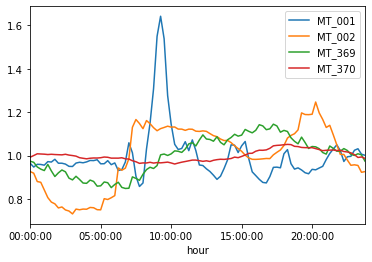

In [21]:
average_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()
plt.show()

## Clustering Analysis on the average normalized curves

In [22]:
X = average_curves_norm.copy()
X = np.array(X.T) # put it on the right format

# Questions

**Q1: **

a. Determine what a convenient number of clusters. Justify your choice.  Make use of the sklearn's package for k-means for this. 

b. Make a plot for each cluster, that includes:
    - The number of clients in the cluster (you can put this in the title of the plot)
    - All the curves in the cluster
    - The curve corresponding to the center of the cluster (make this curve thicker to distinguish it from the individual curves).  The center is also sometimes referred to as "centroid".
    
You have 2 separate plots for each cluster if you prefer (one for the individual curves, one for the centroid)

**Q1.a. Number of Clusters**

**Using Intertia**

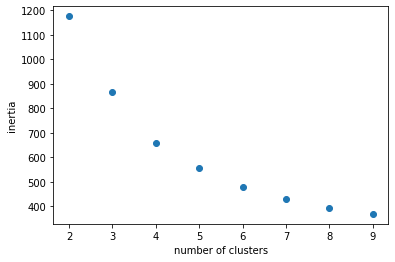

In [23]:
n_clusters=[2,3,4,5,6,7,8,9]
iner=[]
for n in n_clusters:
    kmeans = KMeans(n, random_state=1).fit(X) 
    inertia = 0
    for J in range(len(X)):
        inertia = inertia + np.linalg.norm(X[J] - kmeans.cluster_centers_[kmeans.labels_[J]])**2
    iner.append(inertia)
    
plt.scatter(n_clusters, iner)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

**Using Silhouette Score**

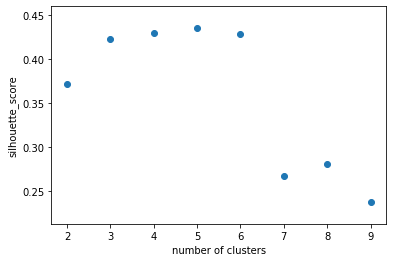

In [24]:
from sklearn import metrics

n_clusters=[2,3,4,5,6,7,8,9]
sil=[]
for n in n_clusters:
    kmeans_model = KMeans(n, random_state=1).fit(X)
    labels = kmeans_model.labels_
    sil.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    
plt.scatter(n_clusters, sil)
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')
plt.show()


By looking at the Silhouette_score graph, it seems that 5 clusters gets the higher score so number of clusters = 5 will be used. 

**Q1.b. Plotting the Clusters**

In [25]:
y_pred = KMeans(n_clusters=5, random_state=1).fit(X)

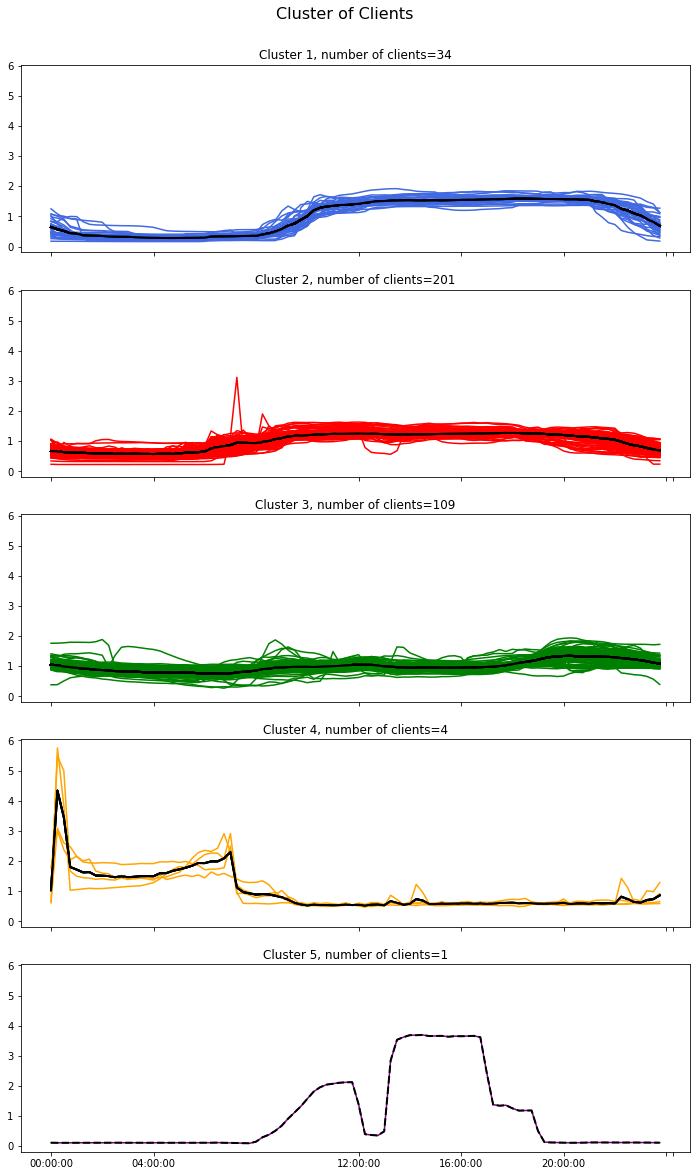

In [26]:
#Using the time of the day as the x axis
hr=average_curves_norm.index

fig,axs=plt.subplots(5,1,sharex='all', sharey='all',figsize=(12,20))
fig.suptitle("Cluster of Clients",y=0.92,fontsize=16)

#Counter of the number of clients in each cluster
count_client=[0,0,0,0,0]

# Based on the cluster number, the client graph will be drawn in the 
#different subplot.
# The centroid is shown in black
for i in range(len(X)):
    if (y_pred.labels_[i]==0):
        axs[0].plot(hr,X[i,:],c='royalblue')
        axs[0].plot(hr,y_pred.cluster_centers_[0],c='black',linewidth=2)
        count_client[0]=count_client[0]+1
        axs[0].set_title("Cluster 1, number of clients={}".format(count_client[0]))
        
    if (y_pred.labels_[i]==1):
        axs[1].plot(hr,X[i,:],c='r')
        axs[1].plot(hr,y_pred.cluster_centers_[1],c='black',linewidth=2)
        count_client[1]=count_client[1]+1
        axs[1].set_title("Cluster 2, number of clients={}".format(count_client[1]))
        
    if (y_pred.labels_[i]==2):
        axs[2].plot(hr,X[i,:],c='g')
        axs[2].plot(hr,y_pred.cluster_centers_[2],c='black',linewidth=2)
        count_client[2]=count_client[2]+1
        axs[2].set_title("Cluster 3, number of clients={}".format(count_client[2]))
        
    if (y_pred.labels_[i]==3):
        axs[3].plot(hr,X[i,:],c='orange')
        axs[3].plot(hr,y_pred.cluster_centers_[3],c='black',linewidth=2)
        count_client[3]=count_client[3]+1
        axs[3].set_title("Cluster 4, number of clients={}".format(count_client[3]))
        
    if (y_pred.labels_[i]==4):
        axs[4].plot(hr,X[i,:],c='purple')
        axs[4].plot(hr,y_pred.cluster_centers_[4],c='black',linewidth=2,linestyle='dashed')
        count_client[4]=count_client[4]+1
        axs[4].set_title("Cluster 5, number of clients={}".format(count_client[4]))
        
plt.xticks(['00:00:00','04:00:00','8:00:00','12:00:00','16:00:00','20:00:00','24:00:00'])
plt.show()




It seems the last cluster has only one client who has a very different demand pattern compared to other clients. 

**Q2: (8 marks)**

In this exercise you work with the daily curves of 1 single client.
First, create a list of arrays, each array containing a normalized curve for a day. The list contains 730 arrays, one for each of the days of 2013 and 2014.

a. Determine the optimal value of k ( number of clusters). You may refer to the module to figure out how to come up with the optimal number of clusters.

b. Based on your result from the Q2 (a), what do understand?  Interpret it perhaps with different perspectives of timelines like weeks or months.

In [27]:
client = 'MT_022'
oneClient = data_13_14[client]
X2 = [] # a list of arrays, each array being a normalized curve for a day
for J in range(2*365):
    X2.extend([np.array(oneClient[J*96:(J+1)*96])])#/np.mean(oneClient[J*96:(J+1)*96])]) 

In [28]:
data_13_14[client]

2013-01-01 00:15:00    31.133250
2013-01-01 00:30:00    28.642590
2013-01-01 00:45:00    27.397260
2013-01-01 01:00:00    24.906600
2013-01-01 01:15:00    24.283935
                         ...    
2014-12-31 23:00:00    31.133250
2014-12-31 23:15:00    34.246575
2014-12-31 23:30:00    36.114570
2014-12-31 23:45:00    34.246575
2015-01-01 00:00:00    31.133250
Name: MT_022, Length: 70080, dtype: float64

**Q2.a. Number of Clusters**

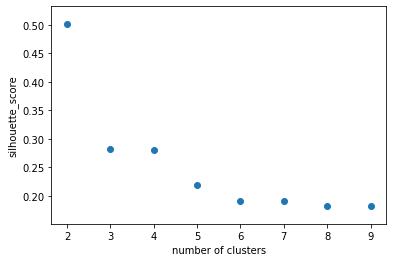

In [29]:
n_clusters=[2,3,4,5,6,7,8,9]
sil=[]
for n in n_clusters:
    kmeans_model = KMeans(n, random_state=1).fit(X2)
    labels = kmeans_model.labels_
    sil.append(metrics.silhouette_score(X2, labels, metric='euclidean'))
    
plt.scatter(n_clusters, sil)
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')
plt.show()

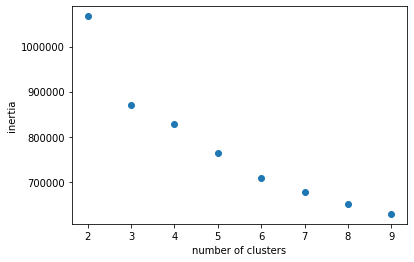

In [30]:
n_clusters=[2,3,4,5,6,7,8,9]
iner=[]
for n in n_clusters:
    kmeans = KMeans(n, random_state=1).fit(X2) 
    inertia = 0
    for J in range(len(X)):
        inertia = inertia + np.linalg.norm(X2[J] - kmeans.cluster_centers_[kmeans.labels_[J]])**2
    iner.append(inertia)
    
plt.scatter(n_clusters, iner)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

It seems usign 2 clusters will give the maximum Silhouette score and Intertia.

**Q2.b.   Interpretation**

In [31]:
y_pred = KMeans(n_clusters=2, random_state=1).fit(X2)

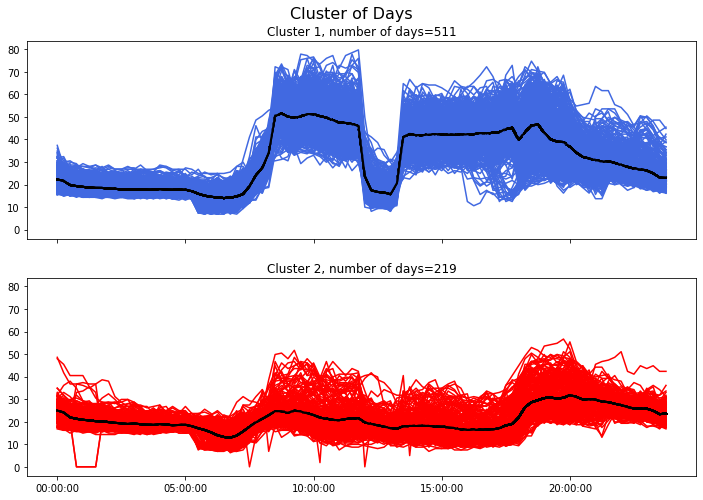

In [32]:
# Using the time of the day as x axis
hr=average_curves_norm.index

fig,axs=plt.subplots(2,1,sharex='all', sharey='all',figsize=(12,8))
fig.suptitle("Cluster of Days",y=0.94,fontsize=16)

#Counter of the number of clients in each cluster
count_days=[0,0]

# Based on the cluster number, the day graph will be drawn in the 
#different subplot.
# The centroid is shown in black

for i in range(len(X2)):
    if (y_pred.labels_[i]==0):
        axs[0].plot(hr,X2[i],c='royalblue')
        axs[0].plot(hr,y_pred.cluster_centers_[0],c='black',linewidth=2)
        count_days[0]=count_days[0]+1
        axs[0].set_title("Cluster 1, number of days={}".format(count_days[0]))
        
    if (y_pred.labels_[i]==1):
        axs[1].plot(hr,X2[i],c='r')
        axs[1].plot(hr,y_pred.cluster_centers_[1],c='black',linewidth=2)
        count_days[1]=count_days[1]+1
        axs[1].set_title("Cluster 2, number of days={}".format(count_days[1]))
        

plt.xticks(['00:00:00','05:00:00','10:00:00','15:00:00','20:00:00'])
plt.show()




#### The following cell generates a list of all the days in the two years 2013-2014, which is helpful to answer part (b)

In [33]:
from datetime import date, timedelta

d1 = date(2013, 1, 1)  # start date
d2 = date(2014, 12, 31)  # end date
delta = d2 - d1         # timedelta
daysyear = []
D = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}
for i in range(delta.days + 1):
    daysyear.extend([D[(d1 + timedelta(days=i)).weekday()]+"-"+str(d1 + timedelta(days=i))])

Based the number of days in each cluster (511 and 219), it seems that the clusters are based on weekdays and weekends ( 5 weekdays and 2 weekdays in each week). To check this thoery, for each cluster, the weekdays and weekends graphs will be presented seperately.  

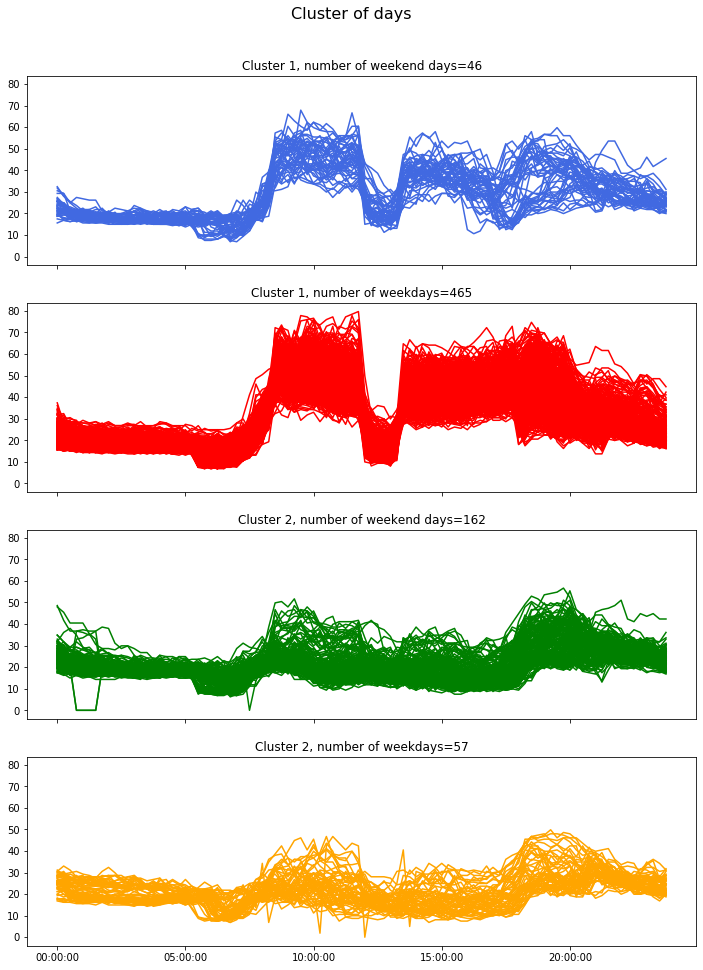

In [34]:
fig,axs=plt.subplots(4,1,sharex='all', sharey='all',figsize=(12,16))
fig.suptitle("Cluster of days",y=0.94,fontsize=16)

# 2 counters for each clsuter
count=[0,0,0,0]

# Seperating the days in each cluster to weekends (Sat and Sun) ad weekdays
for i in range(len(X2)):
    if (y_pred.labels_[i]==0):
        if(('sat' in daysyear[i]) or ('sun' in daysyear[i])):
            axs[0].plot(hr,X2[i],c='royalblue')
            count[0]=count[0]+1
            axs[0].set_title("Cluster 1, number of weekend days={}".format(count[0]))
        else:
            axs[1].plot(hr,X2[i],c='red')
            count[1]=count[1]+1
            axs[1].set_title("Cluster 1, number of weekdays={}".format(count[1]))
            
        
    if (y_pred.labels_[i]==1):
        if(('sat' in daysyear[i]) or ('sun' in daysyear[i])):
            axs[2].plot(hr,X2[i],c='g')
            count[2]=count[2]+1
            axs[2].set_title("Cluster 2, number of weekend days={}".format(count[2]))
        else:
            axs[3].plot(hr,X2[i],c='orange')
            count[3]=count[3]+1
            axs[3].set_title("Cluster 2, number of weekdays={}".format(count[3])) 
        
plt.xticks(['00:00:00','05:00:00','10:00:00','15:00:00','20:00:00'])
plt.show()



**Conslusion**

In [39]:
print('From',count_days[0],'days in Cluster 1,',count[0],
      'days are weekends (',round(count[0]/count_days[0],2)*100,' %) and',
     count[1],'days are week days (',round(count[1]/count_days[0],2)*100,' %).')
print('')
print('From',count_days[1],'days in Cluster 2,',count[2],
      'days are weekends (',round(count[2]/count_days[1],2)*100,' %) and',
     count[3],'days are week days (',round(count[3]/count_days[1],2)*100,' %).')

From 511 days in Cluster 1, 46 days are weekends ( 9.0  %) and 465 days are week days ( 91.0  %).

From 219 days in Cluster 2, 162 days are weekends ( 74.0  %) and 57 days are week days ( 26.0  %).


Based on the percentages calculated above, it seems that the electric demand for this client can be clustered into weekdays and weekends. By looking at the graphs, it can be seen that during the weekends the electric demand is more flat while during the weekdays the electric demand has peaks between 9-11 am and also between 2-8 pm.